In [24]:
import tensorflow
import seaborn as sns
import ssl
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from keras.datasets import boston_housing
from tensorflow.keras.layers import Dense

In [10]:
ssl._create_default_https_context = ssl._create_unverified_context
tensorflow.keras.datasets.boston_housing.load_data()

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [11]:
(x_train,y_train),(x_test,y_test) = tensorflow.keras.datasets.boston_housing.load_data()

In [12]:
print(f"x_train Shape : {x_train.shape}")
print(f"y_train Shape : {y_train.shape}")

x_train Shape : (404, 13)
y_train Shape : (404,)


## Standardization

In [14]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## Construct our MLP

In [15]:
model = keras.Sequential()

model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss='mse', optimizer='sgd', metrics=['mse','mae'])

In [17]:
h = model.fit(x_train,y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 615us/step - loss: 453.7404 - mse: 453.7404 - mae: 17.9636
Epoch 2/100
13/13 [==============================] - 0s 489us/step - loss: 242.9050 - mse: 242.9050 - mae: 12.3470
Epoch 3/100
13/13 [==============================] - 0s 455us/step - loss: 84.0833 - mse: 84.0833 - mae: 6.6977
Epoch 4/100
13/13 [==============================] - 0s 547us/step - loss: 51.7780 - mse: 51.7780 - mae: 5.1617
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 64.3901 - mse: 64.3901 - mae: 5.8846
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 27.8629 - mse: 27.8629 - mae: 3.7279
Epoch 7/100
13/13 [==============================] - 0s 462us/step - loss: 22.7638 - mse: 22.7638 - mae: 3.4244
Epoch 8/100
13/13 [==============================] - 0s 485us/step - loss: 24.3040 - mse: 24.3040 - mae: 3.2366
Epoch 9/100
13/13 [==============================] - 0s 377us/step - loss: 63.2774 - mse: 63.2774 - ma

<Axes: >

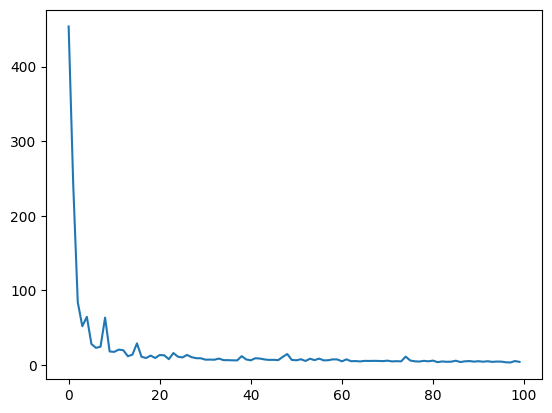

In [19]:
sns.lineplot(x=range(100), y=h.history['loss'])

<Axes: ylabel='mse'>

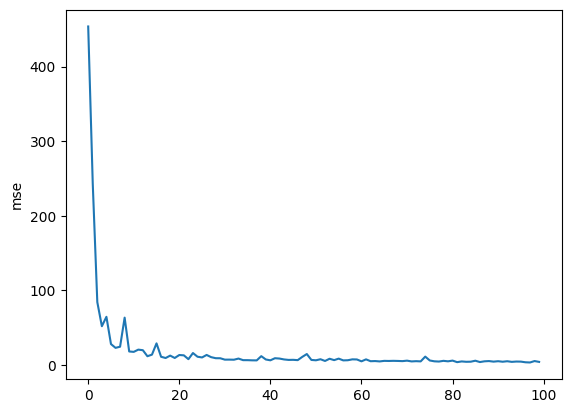

In [21]:
dfResult = pd.DataFrame(h.history)
sns.lineplot(x=range(100), y=dfResult.mse)

## prediction

In [22]:
eloss, emse, emae = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 817us/step - loss: 20.5434 - mse: 20.5434 - mae: 2.9647


In [23]:
print(f'Loss:{eloss:.3f}')
print(f'MSE:{emse:.3f}')
print(f'MAE:{emae:.3f}')

Loss:20.543
MSE:20.543
MAE:2.965


In [25]:
y_pred = model.predict(x_test)
r2s = r2_score(y_test, y_pred)
print(f"DNN regression：the R squared value on the testing set is {r2s}")

4/4 [==============================] - 0s 573us/step
DNN regression：the R squared value on the testing set is 0.753214534989335


In [27]:
y=pred=model.predict(x_test)
y_pred[:10]

4/4 [==============================] - 0s 944us/step


array([[ 9.587058],
       [17.108221],
       [19.599007],
       [36.739037],
       [22.164833],
       [22.719765],
       [27.47257 ],
       [20.973957],
       [18.535658],
       [20.851742]], dtype=float32)

In [28]:
y_test[:10]

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2])